In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_excel('first dataset dominant distortion.xlsx')
#df

In [2]:
df['Dominant Distortion'] = df['Dominant Distortion'].map({'No Distortion': 0, 
                               'All-or-nothing thinking': 1, 
                               'Overgeneralization': 1, 
                               'Mental filter': 1, 
                               'Should statements': 1, 
                               'Labeling': 1, 
                               'Personalization': 1, 
                               'Magnification': 1, 
                               'Emotional Reasoning': 1, 
                               'Mind Reading': 1, 
                               'Fortune-telling': 1})
#df

In [3]:
#смотрю текст по "нашим" метрикам
import os, sys, math

import datetime as dt
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup

from pygents.aigents_api import AigentsSentiment, PygentsSentiment, TextMetrics
from pygents.util import vector_proximity


def language_metrics(lang,metrics_list):
    metrics = {}
    for m in metrics_list:
        metrics[m] = './data/dict/' + lang + '/' + m + '.txt'
    return metrics

        
p = PygentsSentiment('./data/dict/en/positive.txt',
                     './data/dict/en/negative.txt',debug=True)
a = TextMetrics(language_metrics('en',['catastrophizing','dichotomous-reasoning']),debug=True)
s = TextMetrics(language_metrics('en',['positive','negative']),debug=True)

import numpy as np
labels = ['positive','negative','rude',
'catastrophizing','dichotomous-reasoning','disqualifying-positive','emotional-reasoning','fortune-telling',
'labeling','magnification','mental-filtering','mindreading','overgeneralizing','personalizing','should-statement']
l = TextMetrics(language_metrics('en',labels),debug=False)

columns_dict = {0: "Contradictive statements", 1: "Positive statements", 2: "Negative statements", 3: "Mindreading", 4: "Rude statements", 5: "Dichotomous Reasoning", 6: "Emotional Reasoning", 7: "Should statements", 8: "Labeling and mislabeling", 9: "Personalizing", 10: "Magnification and Minimization", 11: "Overgeneralizing", 12: "Catastrophizing", 13: "Disqualifying the Positive", 14: "Mental Filtering", 15: "Fortune-telling"}
metric_names_dict = {"contradictive": 0, "positive": 1, "negative": 2, "mindreading": 3, "rude": 4, "dichotomous-reasoning": 5, "emotional-reasoning": 6, "should-statement": 7, "labeling": 8, "personalizing": 9, "magnification": 10, "overgeneralizing": 11, "catastrophizing": 12, "disqualifying-positive": 13, "mental-filtering": 14, "fortune-telling": 15}
columns_values = np.zeros((len(df), len(columns_dict)))
texts = df['Patient Question'] 

for i, t in enumerate(texts):
    metrics = l.get_sentiment_words(t)
    for metric_name, metric in metrics.items():
        columns_values[i][metric_names_dict[metric_name]] = metric

for j in range(columns_values.shape[1]):
    df[columns_dict[j]] = pd.Series(columns_values[:, j])



#считаю среднее
start_column = 'Contradictive statements'
selected_columns = df.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df["Average (all)"] = average_row

#считаю среднее без positive/negative/rude/contradictive
start_column = 'Mindreading'
selected_columns = df.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df["Average (without Pos/Neg/Rud/Con)"] = average_row

df_future = df.copy() #пригодится попозже
df

,Patient Question,Distorted part,Dominant Distortion,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,...,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,1,0.38,0.32,0.45,0.11,0.19,0.29,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.108750,0.045288
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,1,0.49,0.43,0.55,0.06,0.00,0.06,0.0,...,0.14,0.11,0.00,0.00,0.0,0.0,0.0,0.0,0.115000,0.032692
2,So I’ve been dating on and off this guy for a...,NaN,0,0.45,0.47,0.44,0.04,0.00,0.18,0.0,...,0.00,0.00,0.00,0.16,0.0,0.0,0.0,0.0,0.111250,0.037788
3,My parents got divorced in 2004. My mother has...,NaN,0,0.41,0.45,0.38,0.00,0.00,0.27,0.0,...,0.00,0.15,0.09,0.00,0.0,0.0,0.0,0.0,0.109375,0.047644
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,1,0.46,0.47,0.45,0.00,0.00,0.06,0.0,...,0.11,0.18,0.00,0.00,0.0,0.0,0.0,0.0,0.108125,0.035240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,0,0.41,0.34,0.50,0.00,0.00,0.28,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.095625,0.028894
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,1,0.45,0.42,0.49,0.15,0.00,0.20,0.0,...,0.00,0.15,0.00,0.00,0.0,0.0,0.0,0.0,0.121875,0.043221
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,1,0.45,0.36,0.57,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.086250,0.006635
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,0,0.35,0.28,0.44,0.00,0.00,0.00,0.0,...,0.34,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.088125,0.032933


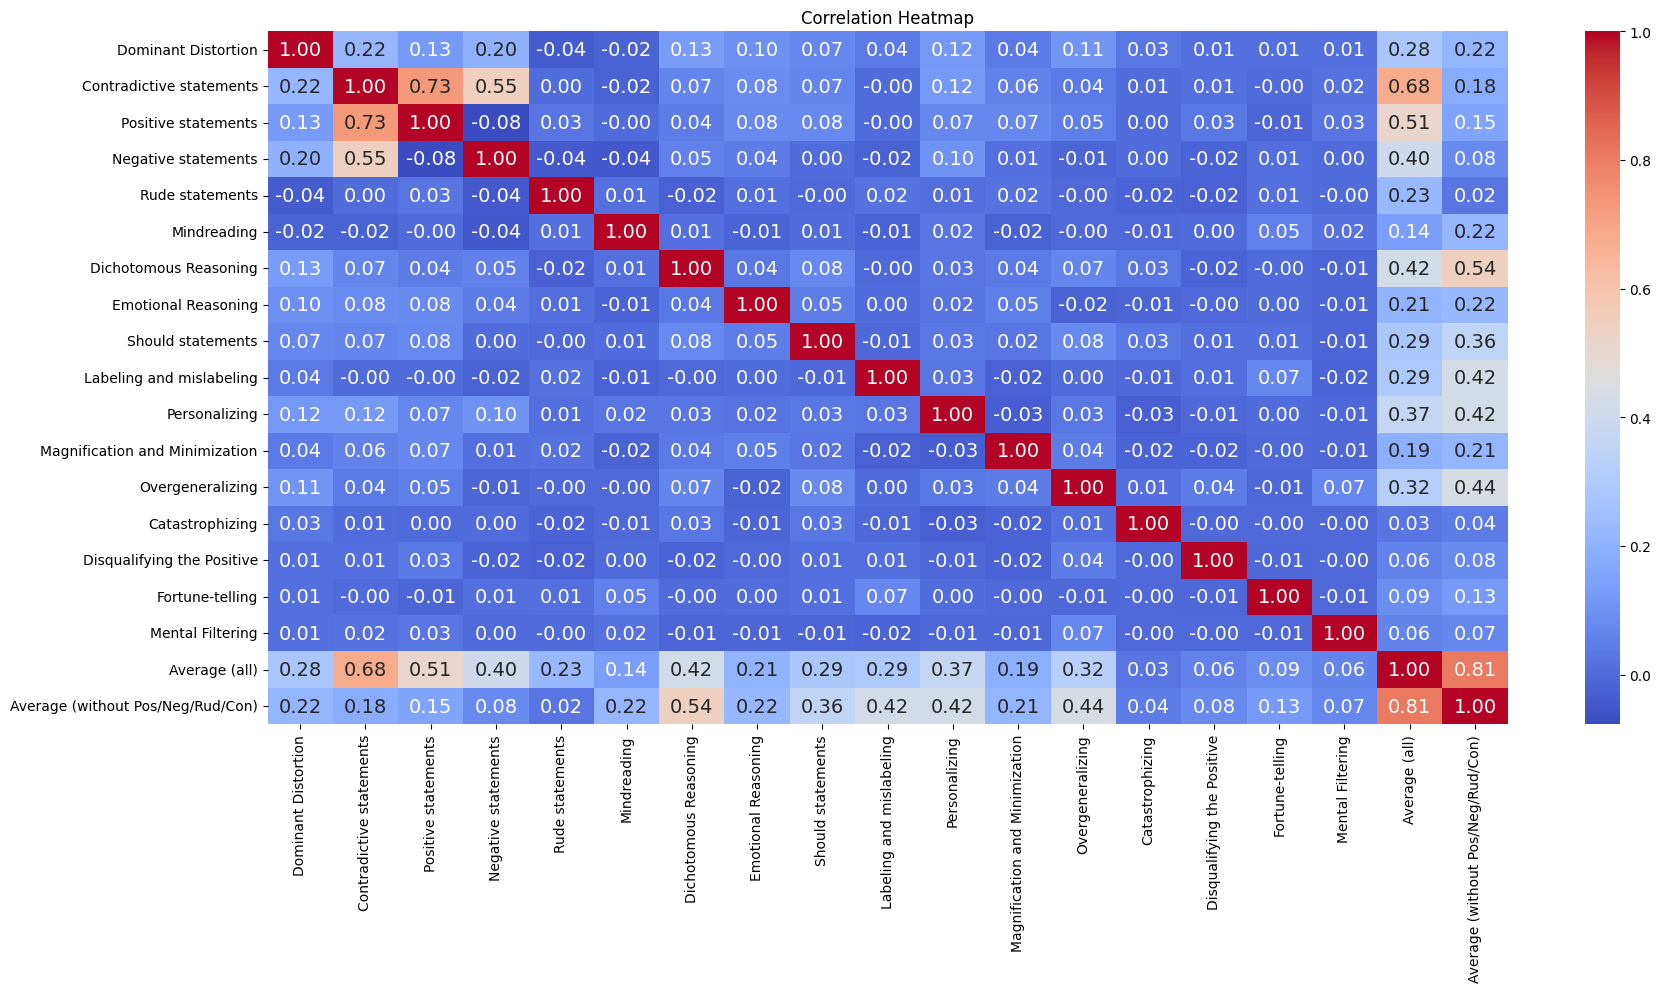

In [4]:
# Посмотрим корреляцию между всеми столбцами
df1 = df.drop('Patient Question', axis=1)
new_df = df1.drop('Distorted part', axis=1)

corr = new_df.corr()


plt.figure(figsize=(20, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 14})
plt.title('Correlation Heatmap')
plt.show()

In [5]:
# Минимальное значение равно 0 для любого столбца. Максимальное значение для столбцов, соотвествующих когнитивным искажениям, равно 1.
# Поэтому найдем максимальные значения для столбцов средних значений. Они нам пригодятся для сведения нашей классификации к бинарному виду.
max_value1 = df['Average (all)'].max()
max_value2 = df['Average (without Pos/Neg/Rud/Con)'].max()
print(max_value1, max_value2)

0.17625000000000002 0.12586538461538463


In [6]:
# Теперь пусть среднее значение для бинарной классификации у столбцов, соотвествующих когнитивным искажениям, равно 0.5.
# А для столбцов средних значений возьмем max_value/2
# Далее присвоим всем значениям 0, если они <= среднего, и 1 иначе.

average1 = max_value1/2
df.loc[df['Average (all)'] > average1, 'Average (all)'] = 1
df.loc[df['Average (all)'] <= average1, 'Average (all)'] = 0

average2 = max_value2/2
df.loc[df['Average (without Pos/Neg/Rud/Con)'] > average2, 'Average (without Pos/Neg/Rud/Con)'] = 1
df.loc[df['Average (without Pos/Neg/Rud/Con)'] <= average2, 'Average (without Pos/Neg/Rud/Con)'] = 0

column_names = df.columns
for i in column_names:
    if i != 'Patient Question' and i != 'Distorted part' and i!= 'Dominant Distortion' and i != 'Average (all)' and i != 'Average (without Pos/Neg/Rud/Con)':
        df.loc[df[i] > 0.5, i] = 1
        df.loc[df[i] <= 0.5, i] = 0
df

,Patient Question,Distorted part,Dominant Distortion,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,...,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,So I’ve been dating on and off this guy for a...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,My parents got divorced in 2004. My mother has...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


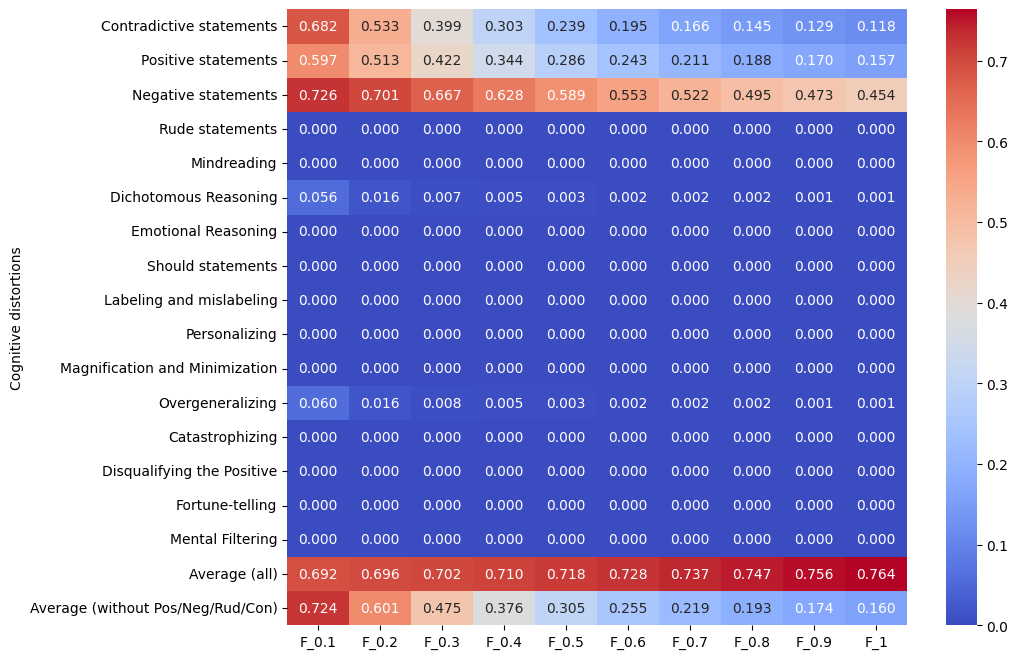

In [7]:
# У нас фиксированный порог = среднему значению. 
#Будем смотреть F_i score между стобцом Label и нашими когнитивными искажениями + средними значениями в зависимости от параметра i 
df_metrics = pd.read_excel('metrics.xlsx')
cognitive_distortions = df_metrics['Cognitive distortions'].tolist()
count = 0

for i in cognitive_distortions:
    
    true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
    false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
    if (true_positives + false_positives) != 0:
        precision = true_positives / (true_positives + false_positives)
    else:
        precision = 0
    
    
    false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
    if (true_positives + false_negatives) != 0:
        recall = true_positives / (true_positives + false_negatives)
    else:
        recall = 0
    
    
    if precision != 0 and recall != 0:
        f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        f_0_8 = (1+(0.8)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
    else:
        f_0_1 = 0
        f_0_2 = 0
        f_0_3 = 0
        f_0_4 = 0
        f_0_5 = 0
        f_0_6 = 0
        f_0_7 = 0
        f_0_8 = 0
        f_0_9 = 0
        f_1 = 0
    df_metrics.loc[count, 'F_0.1'] = f_0_1
    df_metrics.loc[count, 'F_0.2'] = f_0_2
    df_metrics.loc[count, 'F_0.3'] = f_0_3
    df_metrics.loc[count, 'F_0.4'] = f_0_4
    df_metrics.loc[count, 'F_0.5'] = f_0_5
    df_metrics.loc[count, 'F_0.6'] = f_0_6
    df_metrics.loc[count, 'F_0.7'] = f_0_7
    df_metrics.loc[count, 'F_0.8'] = f_0_8
    df_metrics.loc[count, 'F_0.9'] = f_0_9
    df_metrics.loc[count, 'F_1'] = f_1
    count += 1

df_metrics.set_index('Cognitive distortions', inplace=True)
plt.figure(figsize=(10, 8))
sns.heatmap(df_metrics, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
plt.show()
# Эта табличка приведена для порога 0.5 для когнитивных искажений и max_value/2 для их средних.

In [8]:
#Теперь посмотрим значения F_0.1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_01 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_01['Cognitive distortion'].tolist()

count_should_threshold = [0]*10
count_neg_threshold = [0]*10

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0

    count_should_threshold[int(10*k-1)] = ((df['Should statements'] > 0) & (df['Dominant Distortion'] == 1)).sum()
    count_neg_threshold[int(10*k-1)] = ((df['Negative statements'] > 0) & (df['Dominant Distortion'] == 1)).sum()    
    
    #для новой бинарной классификации смотрим F_0.1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        else:
            f_0_1 = 0
        
        df_F_01.loc[count, k] = f_0_1
        count += 1








#Теперь посмотрим значения F_0.2 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_02 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_02['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.2 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        else:
            f_0_2 = 0
        
        df_F_02.loc[count, k] = f_0_2
        count += 1





#Теперь посмотрим значения F_0.3 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_03 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_03['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.3 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        else:
            f_0_3 = 0
        
        df_F_03.loc[count, k] = f_0_3
        count += 1







#Теперь посмотрим значения F_0.4 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_04 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_04['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.4 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        else:
            f_0_4 = 0
        
        df_F_04.loc[count, k] = f_0_4
        count += 1






#Теперь посмотрим значения F_0.5 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_05 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_05['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.5 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        else:
            f_0_5 = 0
        
        df_F_05.loc[count, k] = f_0_5
        count += 1






#Теперь посмотрим значения F_0.6 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_06 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_06['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.6 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        else:
            f_0_6 = 0
        
        df_F_06.loc[count, k] = f_0_6
        count += 1







#Теперь посмотрим значения F_0.7 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_07 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_07['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.7 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        else:
            f_0_7 = 0
        
        df_F_07.loc[count, k] = f_0_7
        count += 1







#Теперь посмотрим значения F_0.8 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_08 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_08['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.8 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_8 = (1+(0.2)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        else:
            f_0_8 = 0
        
        df_F_08.loc[count, k] = f_0_8
        count += 1








#Теперь посмотрим значения F_0.9 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_09 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F_09['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F_0.9 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        else:
            f_0_9 = 0
        
        df_F_09.loc[count, k] = f_0_9
        count += 1










#Теперь посмотрим значения F1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F1 = pd.read_excel('F1 score.xlsx')
cognitive_distortions = df_F1['Cognitive distortion'].tolist()

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
        
    #для новой бинарной классификации смотрим F1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 1)).sum()
        false_positives = ((df[i] == 1) & (df['Dominant Distortion'] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df['Dominant Distortion'] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
        else:
            f_1 = 0
        
        df_F1.loc[count, k] = f_1
        count += 1

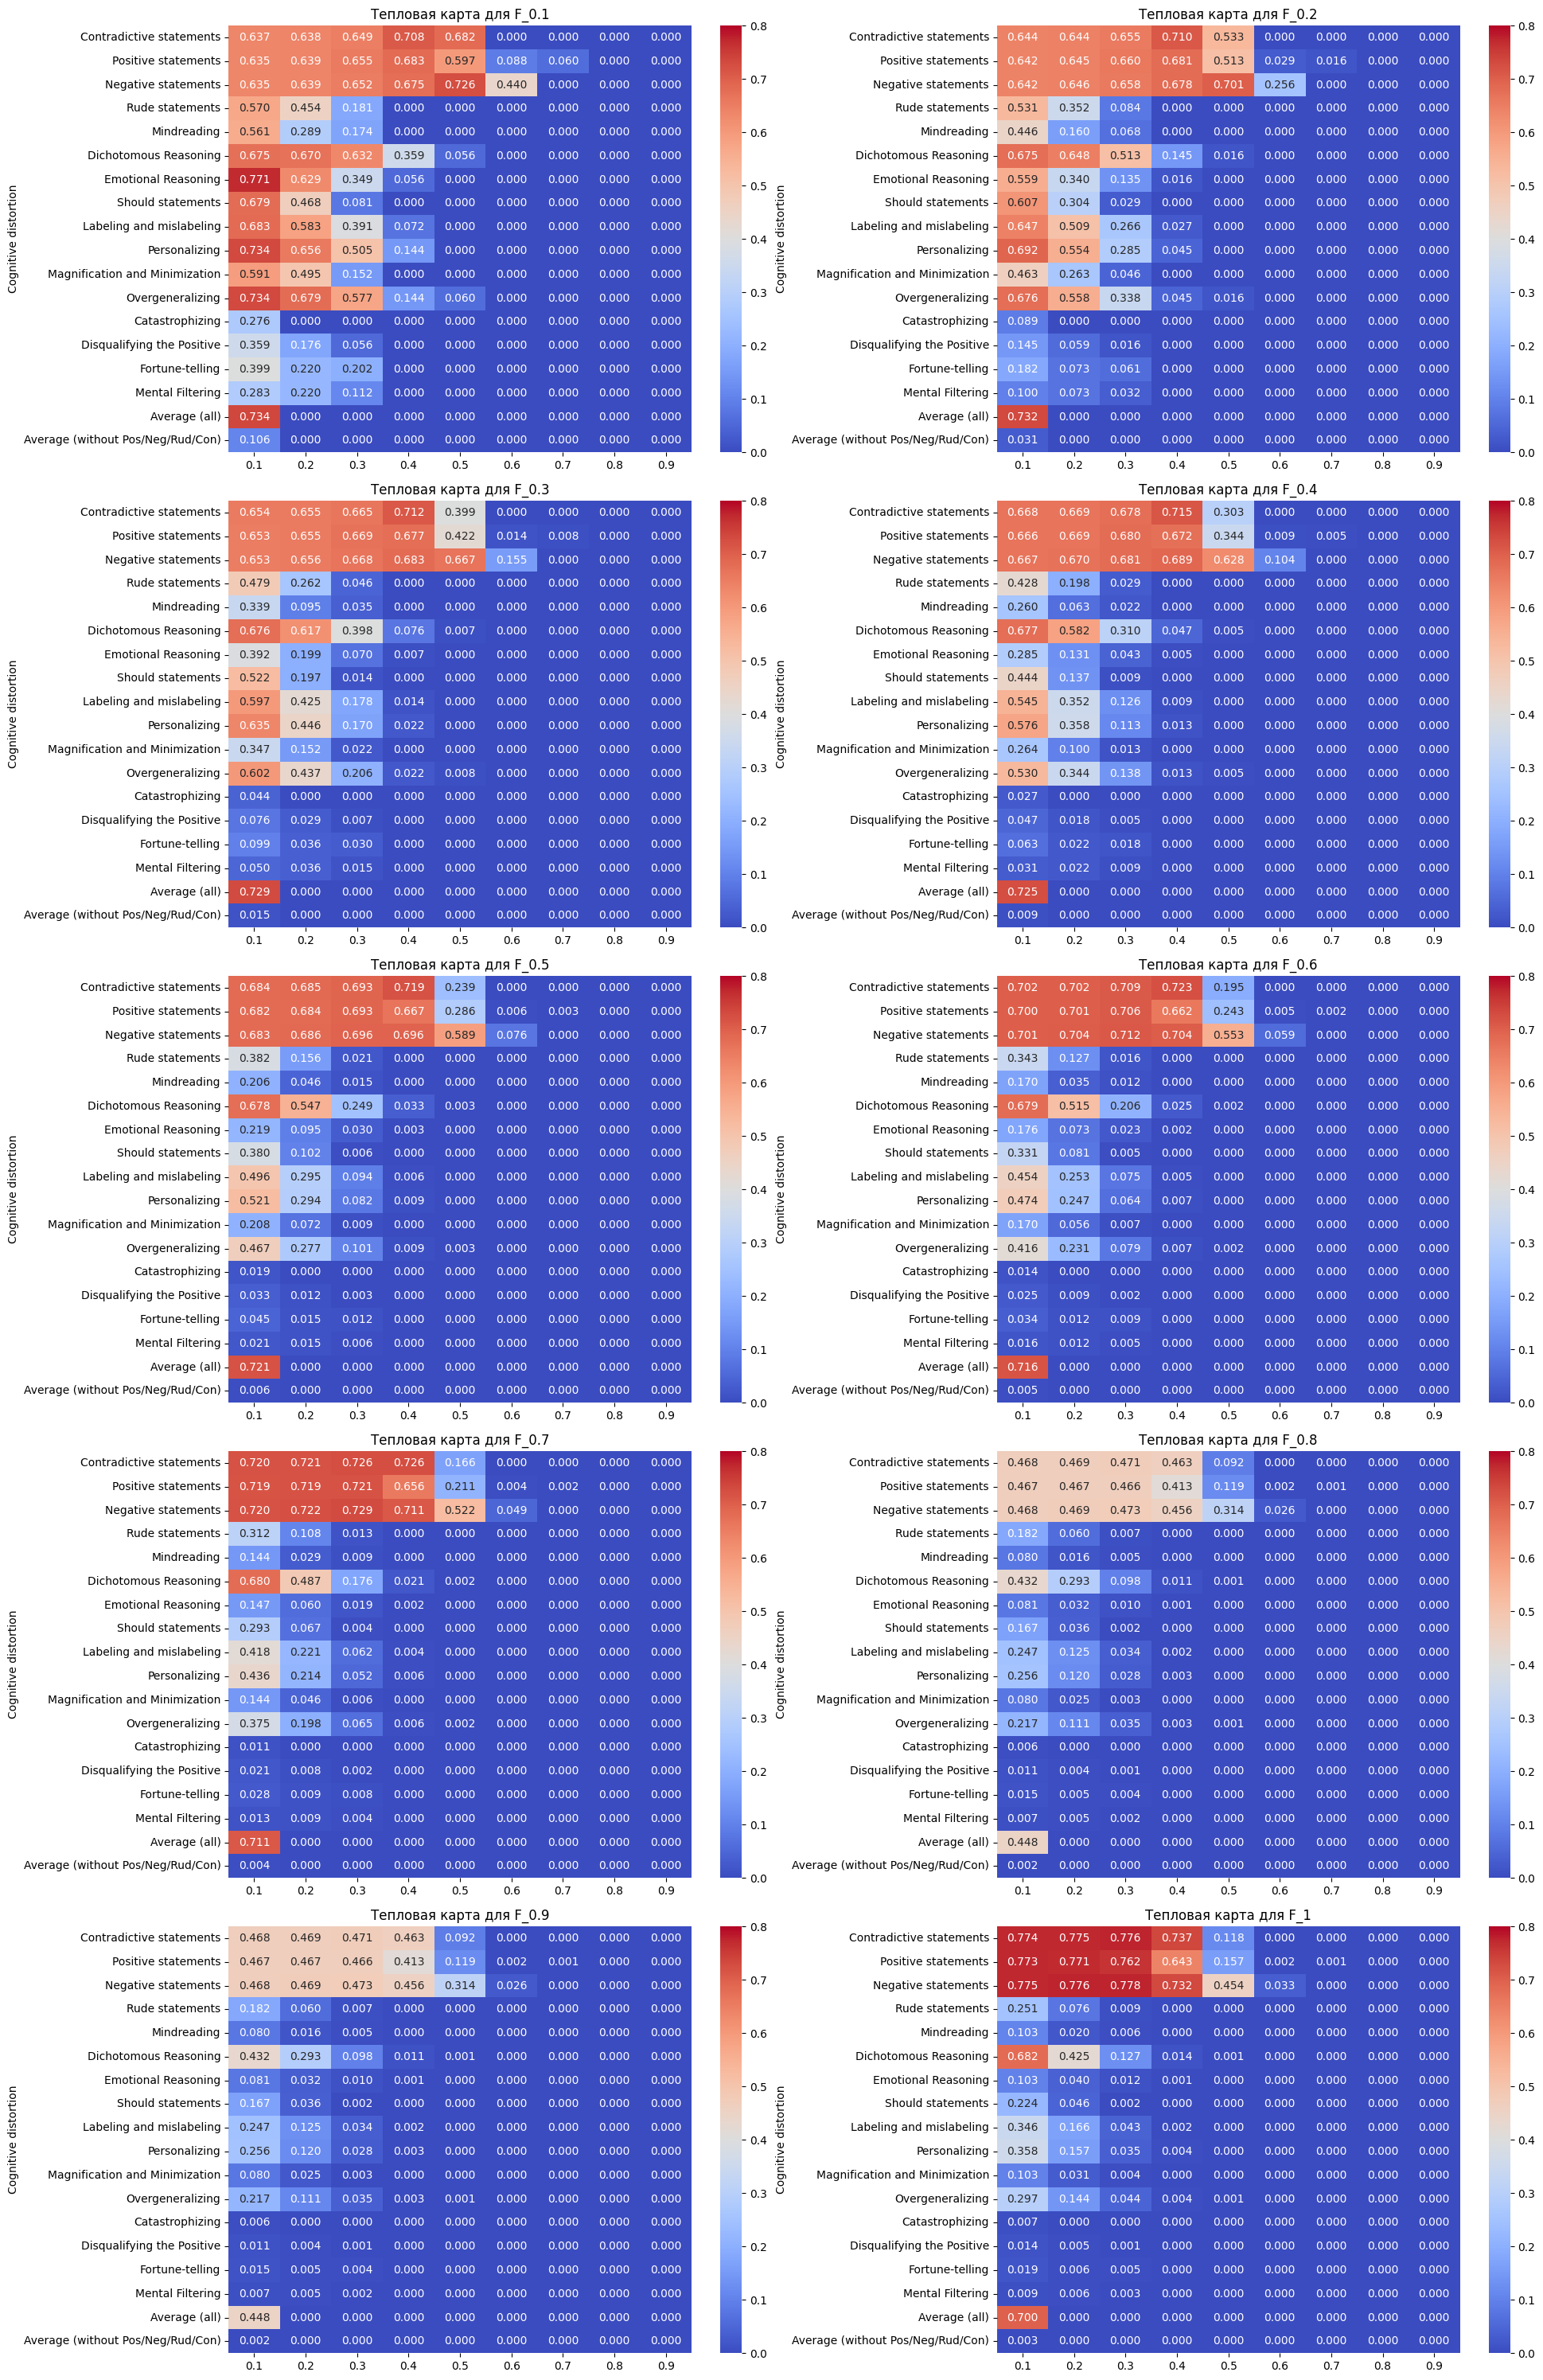

In [9]:
# Создаем фигуру и оси подграфиков
fig, axs = plt.subplots(5, 2, figsize=(20, 30))  # 2 строки, 5 столбцов

# Преобразуем оси подграфиков в одномерный массив для удобства обращения к ним
axs = axs.flatten()


df_F_01.set_index('Cognitive distortion', inplace=True)
df_F_02.set_index('Cognitive distortion', inplace=True)
df_F_03.set_index('Cognitive distortion', inplace=True)
df_F_04.set_index('Cognitive distortion', inplace=True)
df_F_05.set_index('Cognitive distortion', inplace=True)
df_F_06.set_index('Cognitive distortion', inplace=True)
df_F_07.set_index('Cognitive distortion', inplace=True)
df_F_08.set_index('Cognitive distortion', inplace=True)
df_F_09.set_index('Cognitive distortion', inplace=True)
df_F1.set_index('Cognitive distortion', inplace=True)





# Отображаем тепловые карты
sns.heatmap(df_F_01, ax=axs[0], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[0].set_title('Тепловая карта для F_0.1')

sns.heatmap(df_F_02, ax=axs[1], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[1].set_title('Тепловая карта для F_0.2')

sns.heatmap(df_F_03, ax=axs[2], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[2].set_title('Тепловая карта для F_0.3')

sns.heatmap(df_F_04, ax=axs[3], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[3].set_title('Тепловая карта для F_0.4')

sns.heatmap(df_F_05, ax=axs[4], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[4].set_title('Тепловая карта для F_0.5')

sns.heatmap(df_F_06, ax=axs[5], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[5].set_title('Тепловая карта для F_0.6')

sns.heatmap(df_F_07, ax=axs[6], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[6].set_title('Тепловая карта для F_0.7')

sns.heatmap(df_F_08, ax=axs[7], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[7].set_title('Тепловая карта для F_0.8')

sns.heatmap(df_F_08, ax=axs[8], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[8].set_title('Тепловая карта для F_0.9')

sns.heatmap(df_F1, ax=axs[9], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[9].set_title('Тепловая карта для F_1')



            
# Отображаем графики
plt.tight_layout()
plt.show()

In [10]:
df = pd.read_excel('first dataset dominant distortion.xlsx')
df_future['Dominant Distortion'] = df['Dominant Distortion']
df = df_future.copy()
df['Dominant Distortion'] = df['Dominant Distortion'].map({'No Distortion': 'No Distortion', 
                               'All-or-nothing thinking': 'Dichotomous Reasoning', 
                               'Overgeneralization': 'Overgeneralizing', 
                               'Mental filter': 'Mental Filtering', 
                               'Should statements': 'Should statements', 
                               'Labeling': 'Labeling and mislabeling', 
                               'Personalization': 'Personalizing', 
                               'Magnification': 'Magnification and Minimization', 
                               'Emotional Reasoning': 'Emotional Reasoning', 
                               'Mind Reading': 'Mindreading', 
                               'Fortune-telling': 'Fortune-telling'})
df

,Patient Question,Distorted part,Dominant Distortion,Contradictive statements,Positive statements,Negative statements,Rude statements,Mindreading,Dichotomous Reasoning,Emotional Reasoning,...,Labeling and mislabeling,Personalizing,Magnification and Minimization,Overgeneralizing,Catastrophizing,Disqualifying the Positive,Fortune-telling,Mental Filtering,Average (all),Average (without Pos/Neg/Rud/Con)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalizing,0.38,0.32,0.45,0.11,0.19,0.29,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.108750,0.045288
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling and mislabeling,0.49,0.43,0.55,0.06,0.00,0.06,0.0,...,0.14,0.11,0.00,0.00,0.0,0.0,0.0,0.0,0.115000,0.032692
2,So I’ve been dating on and off this guy for a...,NaN,No Distortion,0.45,0.47,0.44,0.04,0.00,0.18,0.0,...,0.00,0.00,0.00,0.16,0.0,0.0,0.0,0.0,0.111250,0.037788
3,My parents got divorced in 2004. My mother has...,NaN,No Distortion,0.41,0.45,0.38,0.00,0.00,0.27,0.0,...,0.00,0.15,0.09,0.00,0.0,0.0,0.0,0.0,0.109375,0.047644
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,0.46,0.47,0.45,0.00,0.00,0.06,0.0,...,0.11,0.18,0.00,0.00,0.0,0.0,0.0,0.0,0.108125,0.035240
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,0.41,0.34,0.50,0.00,0.00,0.28,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.095625,0.028894
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralizing,0.45,0.42,0.49,0.15,0.00,0.20,0.0,...,0.00,0.15,0.00,0.00,0.0,0.0,0.0,0.0,0.121875,0.043221
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental Filtering,0.45,0.36,0.57,0.00,0.00,0.00,0.0,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.086250,0.006635
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,0.35,0.28,0.44,0.00,0.00,0.00,0.0,...,0.34,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.088125,0.032933


In [11]:
#ставим диагноз по нашим метрикам и сравниваем его с dominant distortion
result_distortions_ind = []
result_distortions = []
count = 0
for i in range(len(df)):
    row_values = df.iloc[i, 3:].values
    dominant_distortion = df.at[i, 'Dominant Distortion'] 
    
    maxx = -1
    for j in range(len(row_values)):
        if row_values[j] > maxx:
            maxx = row_values[j]
    
    for j in range(len(row_values)):
        if row_values[j] == maxx:
            result_distortions_ind.append(j)

    for j in range(len(result_distortions_ind)):
        result_distortions.append(df.columns[result_distortions_ind[j]+3])

    if ((dominant_distortion in result_distortions) or (dominant_distortion == 'No Distortion' and len(result_distortions_ind) == 0)):
        count+=1
print(count)

813


In [12]:
# В тепловой карте для F_0.1 есть 4 максимума: Emotional Reasoning, Personalizing, Overgeneralizing и Average (all)
# Average (all) нет смысла смотреть, а по когнитивным искажением посмотрим, сколько их в самом датасете
df_dom_and_sec = pd.read_excel('first dataset dominant and secondary distortions.xlsx')

df_dom_and_sec['Dominant Distortion'] = df_dom_and_sec['Dominant Distortion'].map({'No Distortion': 'No Distortion', 
                               'All-or-nothing thinking': 'Dichotomous Reasoning', 
                               'Overgeneralization': 'Overgeneralizing', 
                               'Mental filter': 'Mental Filtering', 
                               'Should statements': 'Should statements', 
                               'Labeling': 'Labeling and mislabeling', 
                               'Personalization': 'Personalizing', 
                               'Magnification': 'Magnification and Minimization', 
                               'Emotional Reasoning': 'Emotional Reasoning', 
                               'Mind Reading': 'Mindreading', 
                               'Fortune-telling': 'Fortune-telling'})
df_dom_and_sec['Secondary Distortion (Optional)'] = df_dom_and_sec['Secondary Distortion (Optional)'].map({'No Distortion': 'No Distortion', 
                               'All-or-nothing thinking': 'Dichotomous Reasoning', 
                               'Overgeneralization': 'Overgeneralizing', 
                               'Mental filter': 'Mental Filtering', 
                               'Should statements': 'Should statements', 
                               'Labeling': 'Labeling and mislabeling', 
                               'Personalization': 'Personalizing', 
                               'Magnification': 'Magnification and Minimization', 
                               'Emotional Reasoning': 'Emotional Reasoning', 
                               'Mind Reading': 'Mindreading', 
                               'Fortune-telling': 'Fortune-telling'})

count_emotional_reasoning = ((df_dom_and_sec['Dominant Distortion'] == 'Emotional Reasoning') | (df_dom_and_sec['Secondary Distortion (Optional)'] == 'Emotional Reasoning')).sum()
count_personalizing = ((df_dom_and_sec['Dominant Distortion'] == 'Personalizing') | (df_dom_and_sec['Secondary Distortion (Optional)'] == 'Personalizing')).sum()
count_overgeneralizing = ((df_dom_and_sec['Dominant Distortion'] == 'Overgeneralizing') | (df_dom_and_sec['Secondary Distortion (Optional)'] == 'Overgeneralizing')).sum()

print('Число Emotional Reasoning в датасете', count_emotional_reasoning)
print('Число Personalizing в датасете', count_personalizing)
print('Число Overgeneralizing в датасете', count_overgeneralizing)

Число Emotional Reasoning в датасете 169
Число Personalizing в датасете 202
Число Overgeneralizing в датасете 277


5060


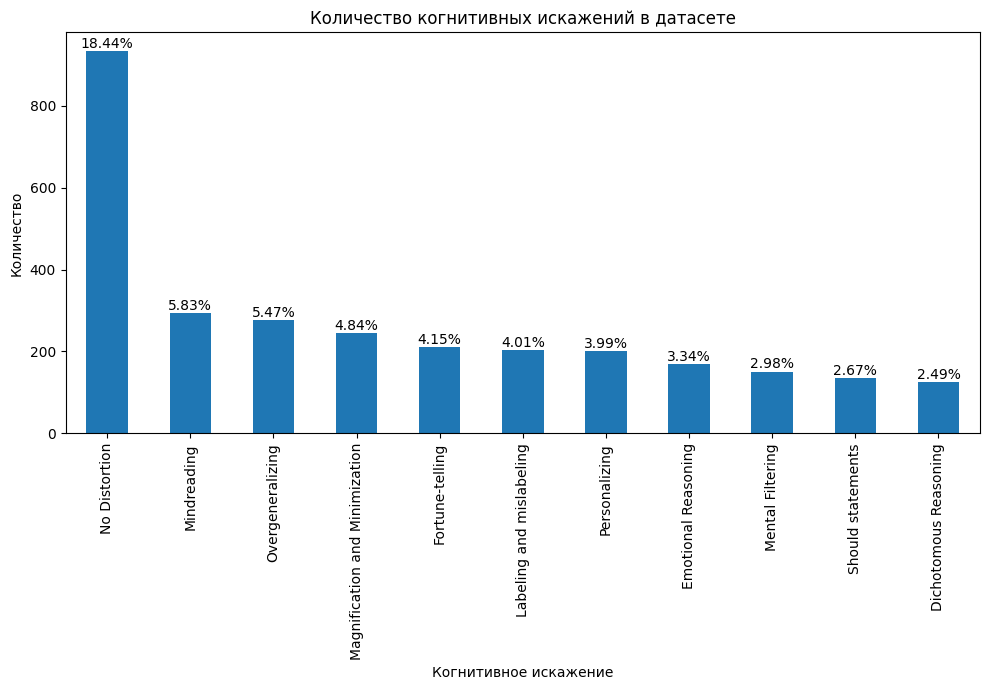

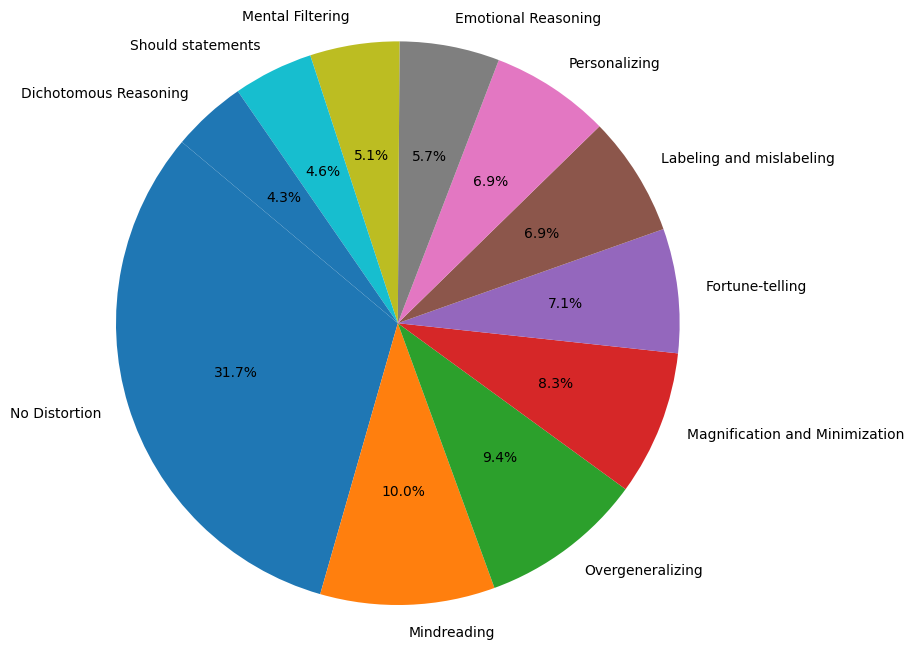

In [13]:
# Посмотрим, сколько и какие искажения присутствуют в датасете по Dominant Distortion и Secondary Distortion
all_diagnoses = pd.concat([df_dom_and_sec['Dominant Distortion'], df_dom_and_sec['Secondary Distortion (Optional)']])

diagnosis_counts = all_diagnoses.value_counts()

total_diagnoses = len(all_diagnoses)
diagnosis_percentages = (diagnosis_counts / total_diagnoses) * 100
print(total_diagnoses)

#построение ступенчатой диаграммы - ТУТ УЧИТЫВАЮТСЯ ЗНАЧЕНИЯ NAN
plt.figure(figsize=(10, 7))
diagnosis_counts.plot(kind='bar')
plt.title('Количество когнитивных искажений в датасете')
plt.xlabel('Когнитивное искажение')
plt.ylabel('Количество')

for i, count in enumerate(diagnosis_counts):
    percentage = round(diagnosis_percentages.iloc[i], 2)
    plt.text(i, count + 0.1, f'{percentage}%', ha='center', va='bottom')
    
plt.tight_layout()
plt.show()


# Построение круговой диаграммы
plt.figure(figsize=(8, 8))
plt.pie(diagnosis_counts, labels=diagnosis_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.show()


In [14]:
df_F_metrics = pd.read_excel('first dataset F metrics.xlsx')
df_F_metrics['Patient Question'] = df_dom_and_sec['Patient Question']
df_F_metrics['Distorted part'] = df_dom_and_sec['Distorted part']
df_F_metrics['Dominant Distortion'] = df_dom_and_sec['Dominant Distortion']
df_F_metrics['Secondary Distortion (Optional)'] = df_dom_and_sec['Secondary Distortion (Optional)']
df_F_metrics['Our Contradictive statements'] = df['Contradictive statements']
df_F_metrics['Our Positive statements'] = df['Positive statements']
df_F_metrics['Our Negative statements'] = df['Negative statements']
df_F_metrics['Our Rude statements'] = df['Rude statements']
df_F_metrics['Our Mindreading'] = df['Mindreading']
df_F_metrics['Our Dichotomous Reasoning'] = df['Dichotomous Reasoning']
df_F_metrics['Our Emotional Reasoning'] = df['Emotional Reasoning']
df_F_metrics['Our Should statements'] = df['Should statements']
df_F_metrics['Our Labeling and mislabeling'] = df['Labeling and mislabeling']
df_F_metrics['Our Personalizing'] = df['Personalizing']
df_F_metrics['Our Magnification and Minimization'] = df['Magnification and Minimization']
df_F_metrics['Our Overgeneralizing'] = df['Overgeneralizing']
df_F_metrics['Our Catastrophizing'] = df['Catastrophizing']
df_F_metrics['Our Disqualifying the Positive'] = df['Disqualifying the Positive']
df_F_metrics['Our Fortune-telling'] = df['Fortune-telling']
df_F_metrics['Our Mental Filtering'] = df['Mental Filtering']
df_F_metrics['Our Average (all)'] = df['Average (all)']
df_F_metrics['Our Average (without Pos/Neg/Rud/Con)'] = df['Average (without Pos/Neg/Rud/Con)']
df_F_metrics

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional),Our Contradictive statements,Our Positive statements,Our Negative statements,Our Rude statements,Our Mindreading,Our Dichotomous Reasoning,...,Their Labeling and mislabeling,Their Personalizing,Their Magnification and Minimization,Their Overgeneralizing,Their Catastrophizing,Their Disqualifying the Positive,Their Fortune-telling,Their Mental Filtering,Their Average (all),Their Average (without Pos/Neg/Rud/Con)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalizing,NaN,0.38,0.32,0.45,0.11,0.19,0.29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling and mislabeling,Emotional Reasoning,0.49,0.43,0.55,0.06,0.00,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,So I’ve been dating on and off this guy for a...,NaN,No Distortion,NaN,0.45,0.47,0.44,0.04,0.00,0.18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,My parents got divorced in 2004. My mother has...,NaN,No Distortion,NaN,0.41,0.45,0.38,0.00,0.00,0.27,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning,0.46,0.47,0.45,0.00,0.00,0.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,NaN,No Distortion,NaN,0.41,0.34,0.50,0.00,0.00,0.28,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralizing,NaN,0.45,0.42,0.49,0.15,0.00,0.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental Filtering,Mindreading,0.45,0.36,0.57,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2528,From the U.S.: I am a 21 year old woman who ha...,NaN,No Distortion,NaN,0.35,0.28,0.44,0.00,0.00,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
# Берем нашу небинарную классификацию и добавляем к ней постановку диагноза по Dominant Distortion и Secondary Distortion
# Было ранее: cognitive_distortions = df_F1['Cognitive distortion'].tolist()
for i in range(2530):
    c_d1 = df_F_metrics.loc[i]['Dominant Distortion']
    c_d2 = df_F_metrics.loc[i]['Secondary Distortion (Optional)']
    if (c_d1 in cognitive_distortions):
        df_F_metrics.at[i, 'Their ' + c_d1] = 1
    if (c_d2 in cognitive_distortions):
        df_F_metrics.at[i, 'Their ' + c_d2] = 1

#df_F_metrics = df_F_metrics.fillna(0)

#считаю среднее
start_column = 'Their Contradictive statements'
selected_columns = df_F_metrics.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df_F_metrics["Their Average (all)"] = average_row

#считаю среднее без positive/negative/rude/contradictive
start_column = 'Their Mindreading'
selected_columns = df_F_metrics.loc[:, start_column:]
average_row = selected_columns.mean(axis=1)
df_F_metrics["Their Average (without Pos/Neg/Rud/Con)"] = average_row

df_F_metrics = df_F_metrics.fillna(0)

df_F_metrics_future = df_F_metrics.copy() #пригодится попозже
df_F_metrics

#Получим небинарную классификацию по нашим метрикам и бинарную диагностику размеченных когнитивных искажений тоже по нашим метрикам

,Patient Question,Distorted part,Dominant Distortion,Secondary Distortion (Optional),Our Contradictive statements,Our Positive statements,Our Negative statements,Our Rude statements,Our Mindreading,Our Dichotomous Reasoning,...,Their Labeling and mislabeling,Their Personalizing,Their Magnification and Minimization,Their Overgeneralizing,Their Catastrophizing,Their Disqualifying the Positive,Their Fortune-telling,Their Mental Filtering,Their Average (all),Their Average (without Pos/Neg/Rud/Con)
0,"Hello, I have a beautiful,smart,outgoing and a...",The voice are always fimilar (someone she know...,Personalizing,0,0.38,0.32,0.45,0.11,0.19,0.29,...,0,1,0,0,0,0,0,0,1.0,1.0
1,Since I was about 16 years old I’ve had these ...,I feel trapped inside my disgusting self and l...,Labeling and mislabeling,Emotional Reasoning,0.49,0.43,0.55,0.06,0.00,0.06,...,1,0,0,0,0,0,0,0,1.0,1.0
2,So I’ve been dating on and off this guy for a...,0,No Distortion,0,0.45,0.47,0.44,0.04,0.00,0.18,...,0,0,0,0,0,0,0,0,0.0,0.0
3,My parents got divorced in 2004. My mother has...,0,No Distortion,0,0.41,0.45,0.38,0.00,0.00,0.27,...,0,0,0,0,0,0,0,0,0.0,0.0
4,I don’t really know how to explain the situati...,I refused to go because I didn’t know if it wa...,Fortune-telling,Emotional Reasoning,0.46,0.47,0.45,0.00,0.00,0.06,...,0,0,0,0,0,0,1,0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2525,I’m a 21 year old female. I spent most of my l...,0,No Distortion,0,0.41,0.34,0.50,0.00,0.00,0.28,...,0,0,0,0,0,0,0,0,0.0,0.0
2526,I am 21 female and have not had any friends fo...,Now I am at university my peers around me all ...,Overgeneralizing,0,0.45,0.42,0.49,0.15,0.00,0.20,...,0,0,0,1,0,0,0,0,1.0,1.0
2527,From the U.S.: My brother is 19 years old and ...,He claims he’s severely depressed and has outb...,Mental Filtering,Mindreading,0.45,0.36,0.57,0.00,0.00,0.00,...,0,0,0,0,0,0,0,1,1.0,1.0
2528,From the U.S.: I am a 21 year old woman who ha...,0,No Distortion,0,0.35,0.28,0.44,0.00,0.00,0.00,...,0,0,0,0,0,0,0,0,0.0,0.0


In [16]:
#Теперь посмотрим значения F_0.1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_01 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        else:
            f_0_1 = 0
        
        df_F_01.loc[count, k] = f_0_1
        count += 1







#Теперь посмотрим значения F_0.2 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_02 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.2 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        else:
            f_0_2 = 0
        
        df_F_02.loc[count, k] = f_0_2
        count += 1








#Теперь посмотрим значения F_0.3 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_03 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.3 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        else:
            f_0_3 = 0
        
        df_F_03.loc[count, k] = f_0_3
        count += 1







#Теперь посмотрим значения F_0.4 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_04 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.4 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        else:
            f_0_4 = 0
        
        df_F_04.loc[count, k] = f_0_4
        count += 1






#Теперь посмотрим значения F_0.5 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_05 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.5 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        else:
            f_0_5 = 0
        
        df_F_05.loc[count, k] = f_0_5
        count += 1








#Теперь посмотрим значения F_0.6 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_06 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.6 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        else:
            f_0_6 = 0
        
        df_F_06.loc[count, k] = f_0_6
        count += 1








#Теперь посмотрим значения F_0.7 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_07 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.7 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        else:
            f_0_7 = 0
        
        df_F_07.loc[count, k] = f_0_7
        count += 1







#Теперь посмотрим значения F_0.8 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_08 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.8 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_8 = (1+(0.8)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        else:
            f_0_8 = 0
        
        df_F_08.loc[count, k] = f_0_8
        count += 1







#Теперь посмотрим значения F_0.9 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F_09 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.9 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        else:
            f_0_9 = 0
        
        df_F_09.loc[count, k] = f_0_9
        count += 1








#Теперь посмотрим значения F_1 для разных порогов каждого столбца когнитивных искажений от 0.1 до 0.9.

df_F1 = pd.read_excel('F1 score.xlsx')

indexes = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
        else:
            f_1 = 0
        
        df_F1.loc[count, k] = f_1
        count += 1


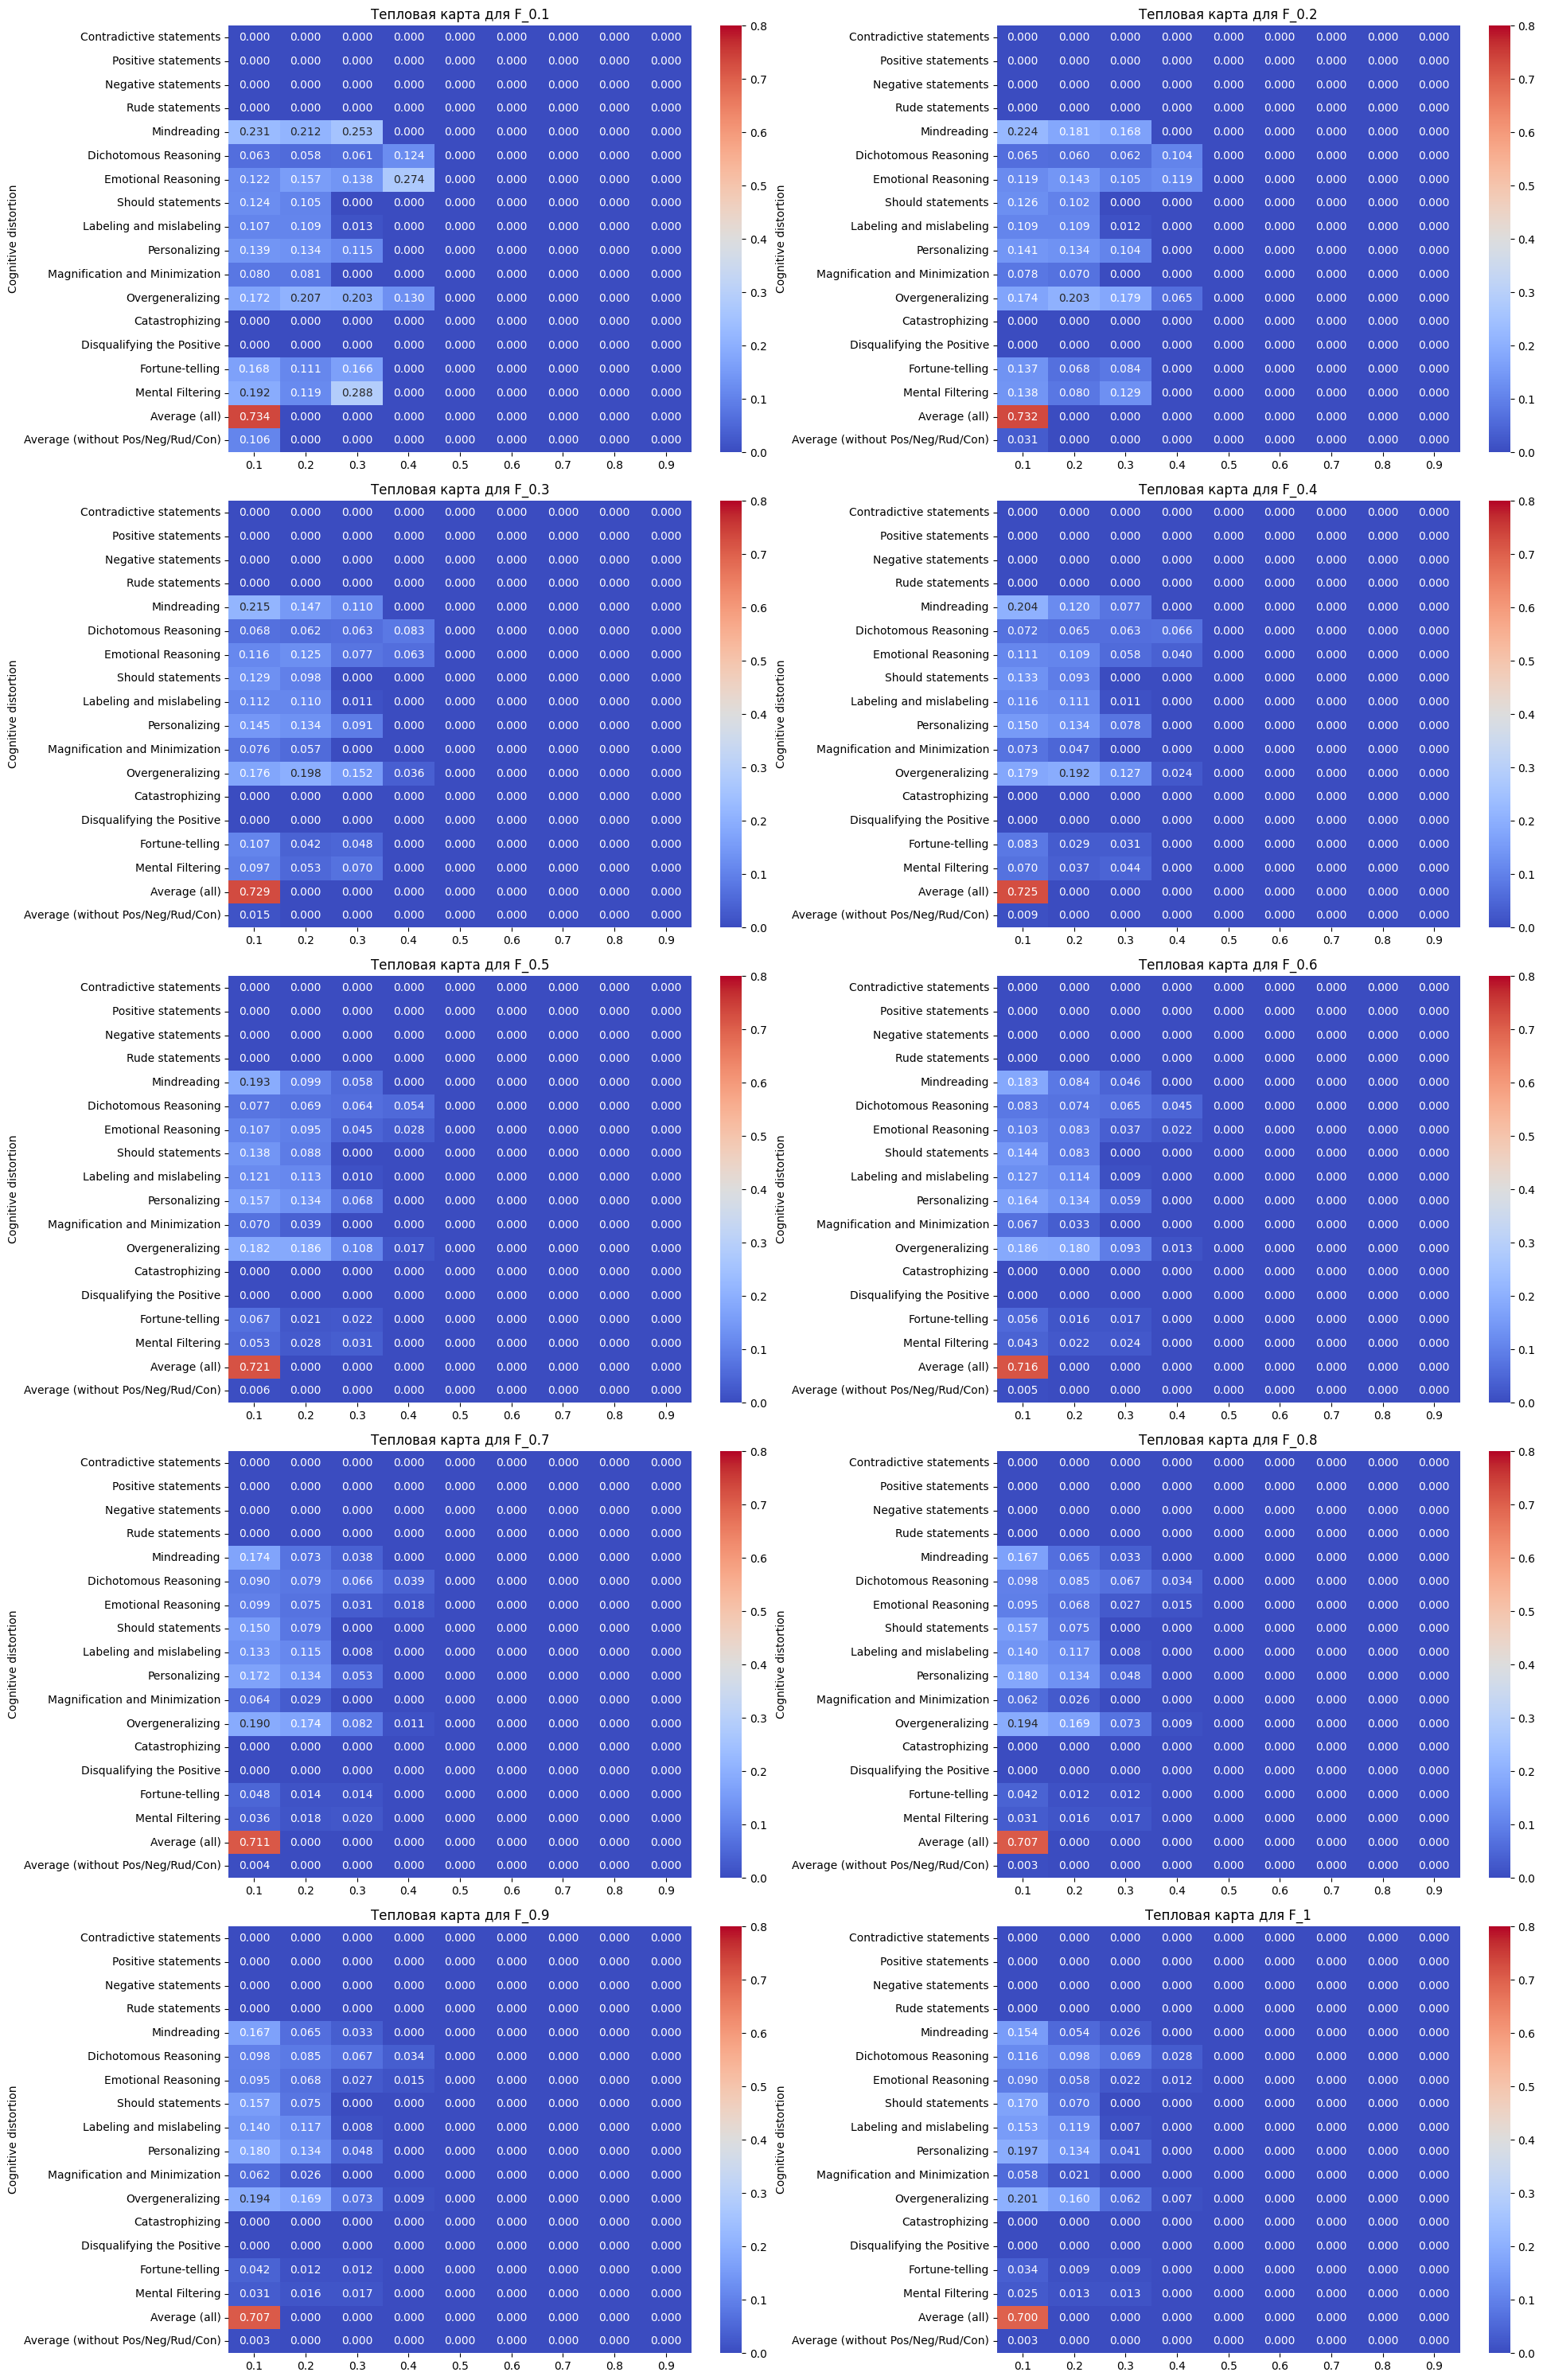

In [17]:
# Создаем фигуру и оси подграфиков
fig, axs = plt.subplots(5, 2, figsize=(20, 30))  # 2 строки, 5 столбцов

# Преобразуем оси подграфиков в одномерный массив для удобства обращения к ним
axs = axs.flatten()


df_F_01.set_index('Cognitive distortion', inplace=True)
df_F_02.set_index('Cognitive distortion', inplace=True)
df_F_03.set_index('Cognitive distortion', inplace=True)
df_F_04.set_index('Cognitive distortion', inplace=True)
df_F_05.set_index('Cognitive distortion', inplace=True)
df_F_06.set_index('Cognitive distortion', inplace=True)
df_F_07.set_index('Cognitive distortion', inplace=True)
df_F_08.set_index('Cognitive distortion', inplace=True)
df_F_09.set_index('Cognitive distortion', inplace=True)
df_F1.set_index('Cognitive distortion', inplace=True)





# Отображаем тепловые карты
sns.heatmap(df_F_01, ax=axs[0], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[0].set_title('Тепловая карта для F_0.1')

sns.heatmap(df_F_02, ax=axs[1], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[1].set_title('Тепловая карта для F_0.2')

sns.heatmap(df_F_03, ax=axs[2], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[2].set_title('Тепловая карта для F_0.3')

sns.heatmap(df_F_04, ax=axs[3], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[3].set_title('Тепловая карта для F_0.4')

sns.heatmap(df_F_05, ax=axs[4], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[4].set_title('Тепловая карта для F_0.5')

sns.heatmap(df_F_06, ax=axs[5], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[5].set_title('Тепловая карта для F_0.6')

sns.heatmap(df_F_07, ax=axs[6], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[6].set_title('Тепловая карта для F_0.7')

sns.heatmap(df_F_08, ax=axs[7], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[7].set_title('Тепловая карта для F_0.8')

sns.heatmap(df_F_08, ax=axs[8], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[8].set_title('Тепловая карта для F_0.9')

sns.heatmap(df_F1, ax=axs[9], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[9].set_title('Тепловая карта для F_1')



            
# Отображаем графики
plt.tight_layout()
plt.show()

In [18]:
#Теперь посмотрим значения F_0.1 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_01 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_1 = (1+(0.1)**2) * (precision*recall)/((((0.1)**2)*precision)+recall)
        else:
            f_0_1 = 0
        
        df_F_01.loc[count, k] = f_0_1
        count += 1







#Теперь посмотрим значения F_0.2 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_02 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.2 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_2 = (1+(0.2)**2) * (precision*recall)/((((0.2)**2)*precision)+recall)
        else:
            f_0_2 = 0
        
        df_F_02.loc[count, k] = f_0_2
        count += 1








#Теперь посмотрим значения F_0.3 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_03 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.3 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_3 = (1+(0.3)**2) * (precision*recall)/((((0.3)**2)*precision)+recall)
        else:
            f_0_3 = 0
        
        df_F_03.loc[count, k] = f_0_3
        count += 1







#Теперь посмотрим значения F_0.4 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_04 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.4 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_4 = (1+(0.4)**2) * (precision*recall)/((((0.4)**2)*precision)+recall)
        else:
            f_0_4 = 0
        
        df_F_04.loc[count, k] = f_0_4
        count += 1






#Теперь посмотрим значения F_0.5 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_05 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.5 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_5 = (1+(0.5)**2) * (precision*recall)/((((0.5)**2)*precision)+recall)
        else:
            f_0_5 = 0
        
        df_F_05.loc[count, k] = f_0_5
        count += 1








#Теперь посмотрим значения F_0.6 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_06 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.6 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_6 = (1+(0.6)**2) * (precision*recall)/((((0.6)**2)*precision)+recall)
        else:
            f_0_6 = 0
        
        df_F_06.loc[count, k] = f_0_6
        count += 1








#Теперь посмотрим значения F_0.7 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_07 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.7 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_7 = (1+(0.7)**2) * (precision*recall)/((((0.7)**2)*precision)+recall)
        else:
            f_0_7 = 0
        
        df_F_07.loc[count, k] = f_0_7
        count += 1







#Теперь посмотрим значения F_0.8 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_08 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.8 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_8 = (1+(0.8)**2) * (precision*recall)/((((0.8)**2)*precision)+recall)
        else:
            f_0_8 = 0
        
        df_F_08.loc[count, k] = f_0_8
        count += 1







#Теперь посмотрим значения F_0.9 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F_09 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_0.9 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_0_9 = (1+(0.9)**2) * (precision*recall)/((((0.9)**2)*precision)+recall)
        else:
            f_0_9 = 0
        
        df_F_09.loc[count, k] = f_0_9
        count += 1








#Теперь посмотрим значения F_1 для разных порогов каждого столбца когнитивных искажений от 0.01 до 0.09.

df_F1 = pd.read_excel('F1 score.xlsx')

indexes = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09]
for k in indexes:
    df = df_future.copy()
    column_names = df.columns
    
    #делаем новую бинарную классификацию в зависимости от порога k
    for j in column_names:
        if j != 'Patient Question' and j != 'Distorted part' and j != 'Dominant Distortion':
            df.loc[df[j] > k, j] = 1
            df.loc[df[j] <= k, j] = 0
 
    
    #для новой бинарной классификации смотрим F_1 score между Label и когнитивными искажениями + средними значениями
    count = 0
    for i in cognitive_distortions:
        
        true_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 1)).sum()
        false_positives = ((df[i] == 1) & (df_F_metrics['Their ' + i] == 0)).sum()
        if (true_positives + false_positives) != 0:
            precision = true_positives / (true_positives + false_positives)
        else:
            precision = 0
        
        false_negatives = ((df[i] == 0) & (df_F_metrics['Their ' + i] == 1)).sum()
        if (true_positives + false_negatives) != 0:
            recall = true_positives / (true_positives + false_negatives)
        else:
            recall = 0
        
        if precision != 0 and recall != 0:
            f_1 = (1+(1)**2) * (precision*recall)/((((1)**2)*precision)+recall)
        else:
            f_1 = 0
        
        df_F1.loc[count, k] = f_1
        count += 1


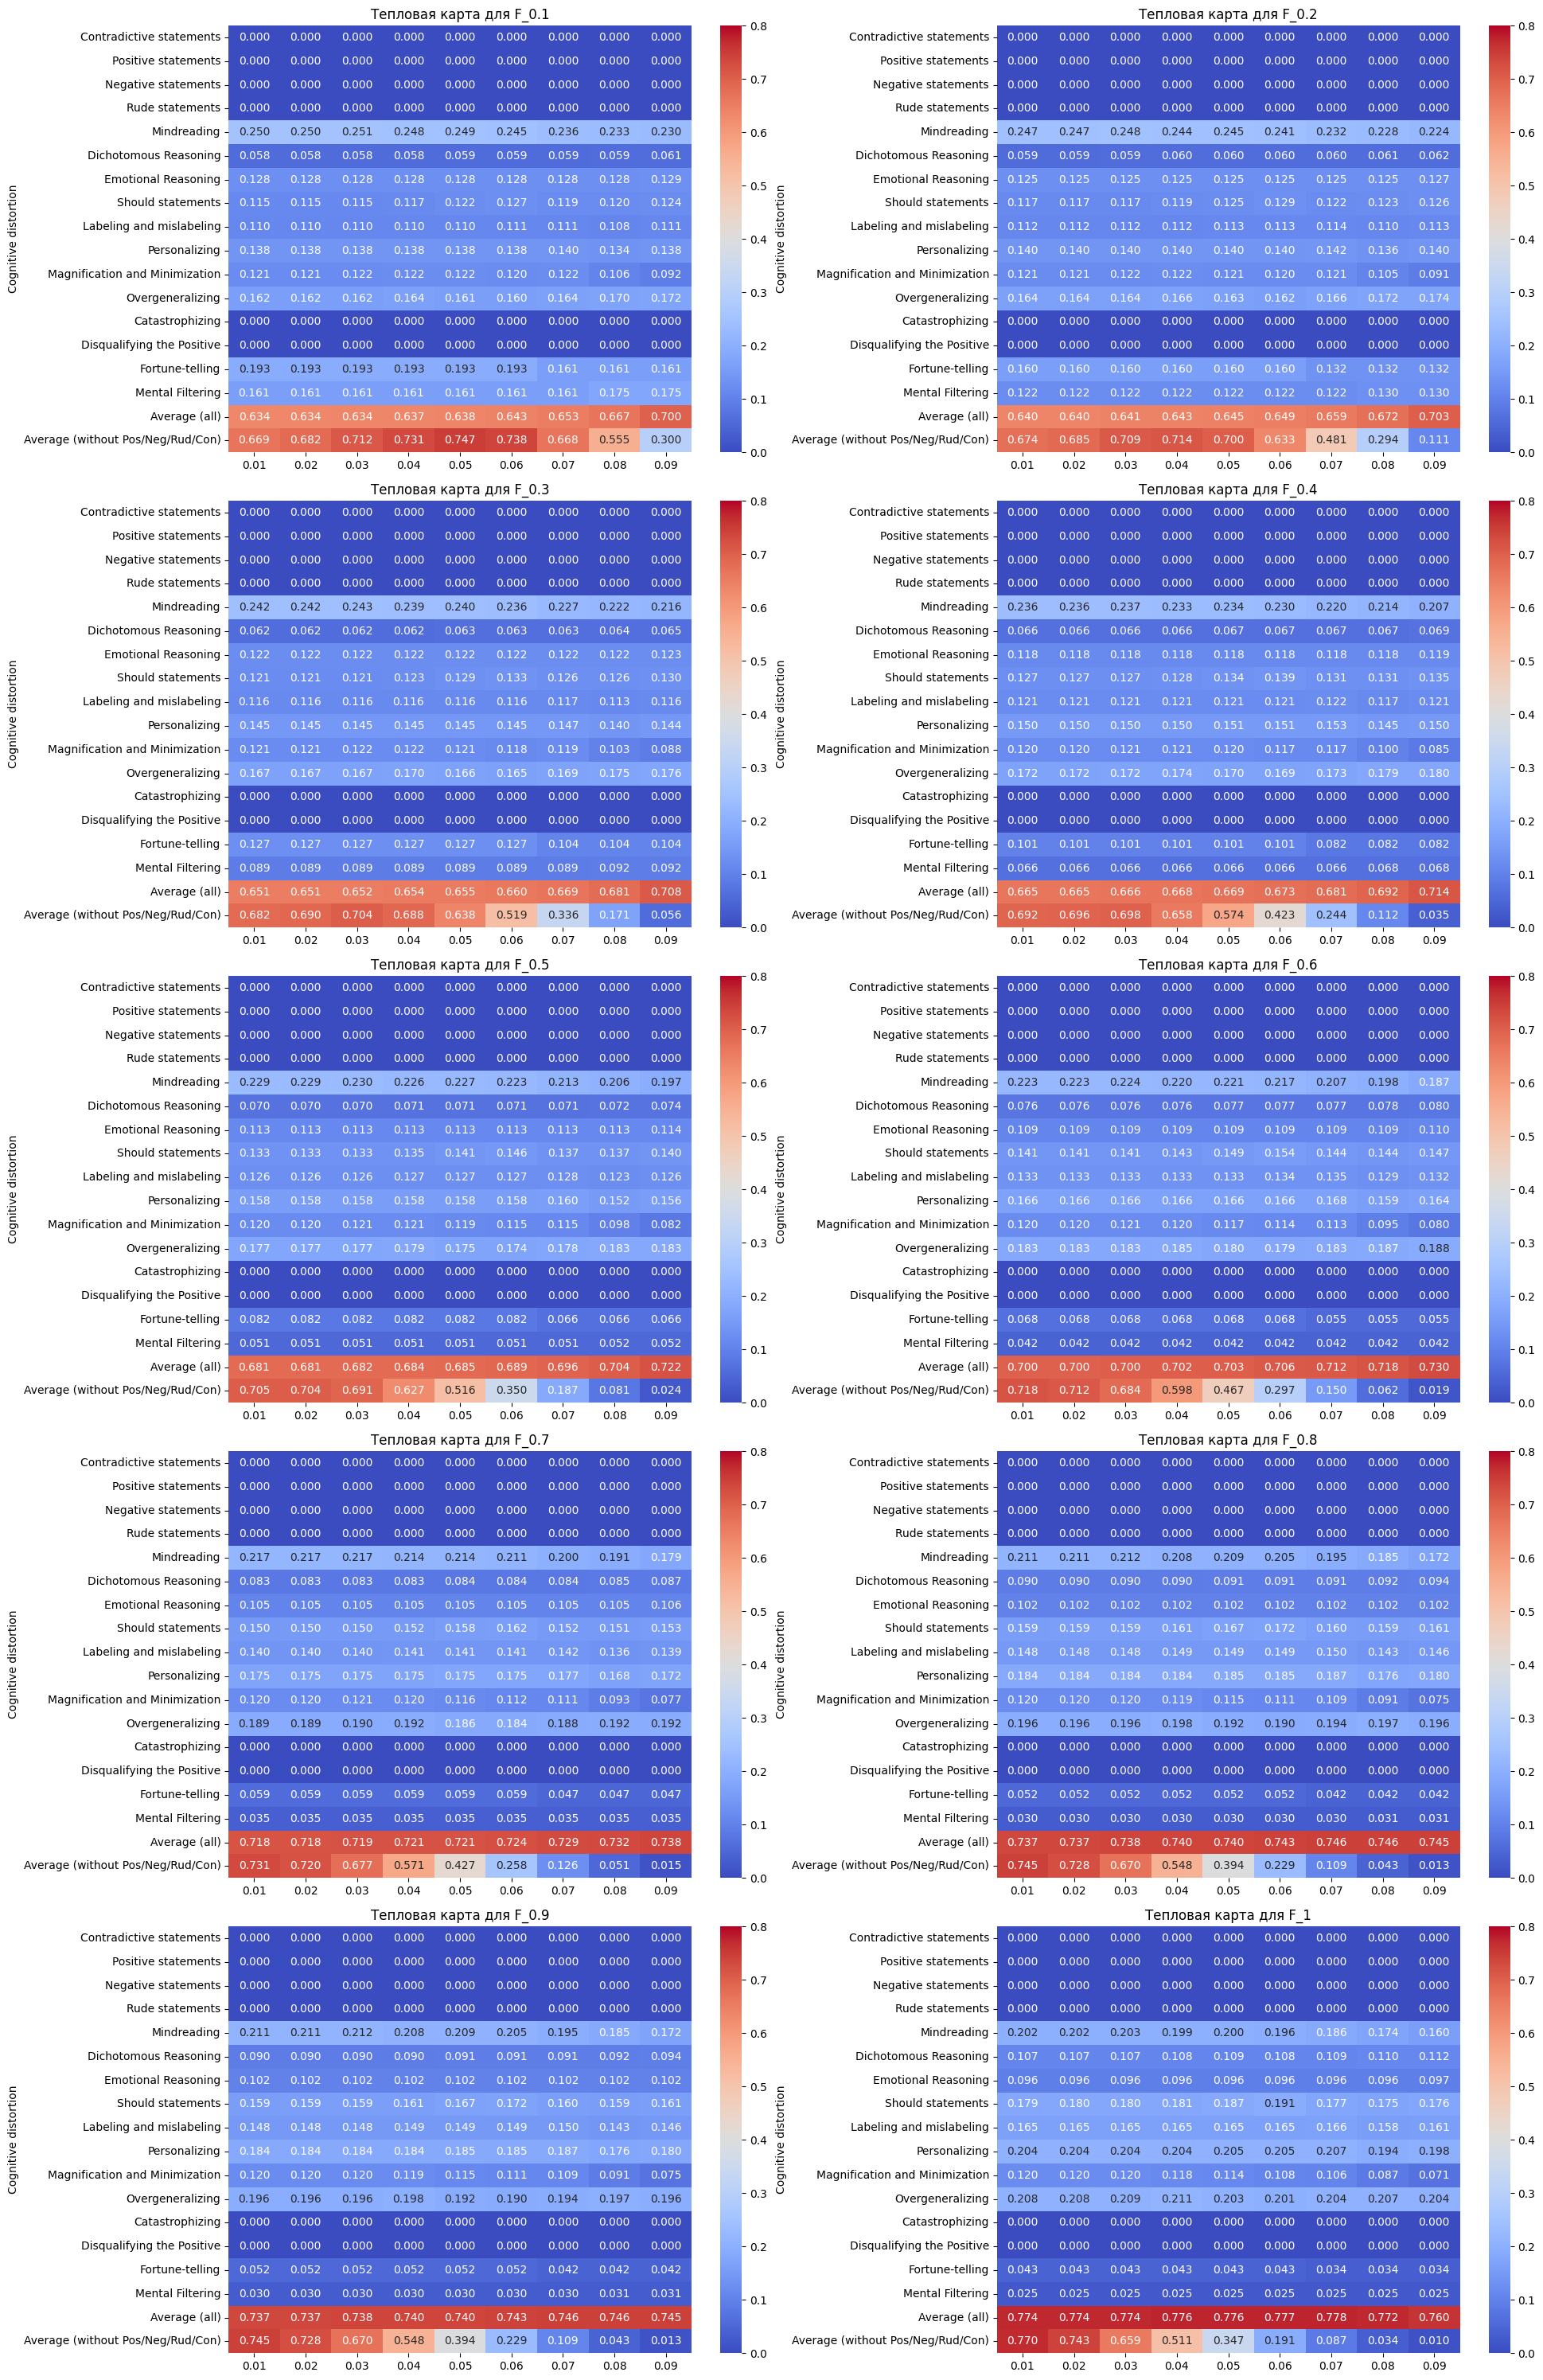

In [19]:
# Создаем фигуру и оси подграфиков
fig, axs = plt.subplots(5, 2, figsize=(20, 30))  # 2 строки, 5 столбцов

# Преобразуем оси подграфиков в одномерный массив для удобства обращения к ним
axs = axs.flatten()


df_F_01.set_index('Cognitive distortion', inplace=True)
df_F_02.set_index('Cognitive distortion', inplace=True)
df_F_03.set_index('Cognitive distortion', inplace=True)
df_F_04.set_index('Cognitive distortion', inplace=True)
df_F_05.set_index('Cognitive distortion', inplace=True)
df_F_06.set_index('Cognitive distortion', inplace=True)
df_F_07.set_index('Cognitive distortion', inplace=True)
df_F_08.set_index('Cognitive distortion', inplace=True)
df_F_09.set_index('Cognitive distortion', inplace=True)
df_F1.set_index('Cognitive distortion', inplace=True)





# Отображаем тепловые карты
sns.heatmap(df_F_01, ax=axs[0], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[0].set_title('Тепловая карта для F_0.1')

sns.heatmap(df_F_02, ax=axs[1], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[1].set_title('Тепловая карта для F_0.2')

sns.heatmap(df_F_03, ax=axs[2], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[2].set_title('Тепловая карта для F_0.3')

sns.heatmap(df_F_04, ax=axs[3], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[3].set_title('Тепловая карта для F_0.4')

sns.heatmap(df_F_05, ax=axs[4], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[4].set_title('Тепловая карта для F_0.5')

sns.heatmap(df_F_06, ax=axs[5], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[5].set_title('Тепловая карта для F_0.6')

sns.heatmap(df_F_07, ax=axs[6], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[6].set_title('Тепловая карта для F_0.7')

sns.heatmap(df_F_08, ax=axs[7], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[7].set_title('Тепловая карта для F_0.8')

sns.heatmap(df_F_08, ax=axs[8], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[8].set_title('Тепловая карта для F_0.9')

sns.heatmap(df_F1, ax=axs[9], vmin=0, vmax=0.8, cmap='coolwarm', annot=True, fmt=".3f", annot_kws={"size": 10})
axs[9].set_title('Тепловая карта для F_1')



            
# Отображаем графики
plt.tight_layout()
plt.show()